In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
def download_dados(tickers, interval = '1d', period = 'max'):
    
    df = yf.download(tickers, interval=interval, period=period)['Adj Close']
    #retorno, df_ln = coin.calc_ret_ln(df)

    return df

In [3]:
ativos = pd.read_csv('ativos.csv', sep=';')
ativos = ativos.iloc[:-40]
ativos.drop([425, 506, 561, 681], inplace=True)

In [4]:
ativos

,Stock,Symbol
0,Microsoft Corp,MSFT
1,Apple Inc.,AAPL
2,Amazon.com Inc.,AMZN
3,Tesla Inc,TSLA
4,Alphabet Inc. Class A,GOOGL
...,...,...
800,SPDR Russell Small Cap Comp,SPMD
801,VanEck Vectors Oil Services,OIH
802,SPDR Portfolio TIPS,SPIP
803,Global X SuperDividend,SDIV


In [5]:
tickers = ' '
for i in range(len(ativos)):
    aux = ativos.iloc[i][1]
    tickers = tickers +' '+ aux
tickers

'  MSFT AAPL AMZN TSLA GOOGL GOOG FB NVDA BRK.B JPM JNJ UNH HD BAC PG V ADBE DIS NFLX CRM MA PYPL XOM TMO PFE CSCO CMCSA ACN ABT PEP MRK AVGO COST NKE VZ KO CVX WMT WFC LLY ABBV INTC DHR MCD T TXN INTU LIN NEE LOW MDT ORCL AMD QCOM UNP UPS HON MS PM GS C NOW BLK RTX SBUX BMY AMAT TGT ISRG AMT CVS SCHW AMGN MRNA BA GE IBM CAT AXP SPGI PLD MMM ANTM ZTS BKNG COP DE ADI ADP SYK PNC CHTR MDLZ TFC GILD CB USB MO LRCX TJX MMC LMT GM CSX MU CME CCI EL DUK ICE SHW EQIX CI F EW TMUS NSC BDX COF REGN FIS ADSK ETN APD AON SO ITW CL MCO WM HCA ILMN BSX D FISV KLAC DXCM FDX HUM NXPI EMR ECL FCX PGR SPG NOC IDXX MSCI EOG EXC DG AIG ATVI JCI SNPS PSA ROP TEL INFO CMG TROW VRTX ALGN IQV APTV EBAY A CDNS BK MET XLNX APH GD SLB CARR MAR DLR FTNT KMB LHX SIVB PRU NEM DOW MCHP TWTR CNC PXD ORLY MSI AEP TT MTCH DD ROST CTSH BIIB SRE MPC HLT BAX TRV O EA GPN SYY PAYX ROK PH RMD FRC PPG AZO SBAC CTAS GIS HPQ ALL STZ YUM STT ADM IFF WBA AMP CBRE WELL DFS MCK AFL PSX VRSK OTIS WMB XEL MTD EFX CMI KEYS ANSS AJG 

In [6]:
#tickers = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA  BRAP4.SA  BRFS3.SA BRKM5.SA BRML3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SULA11.SA SUZB3.SA TAEE11.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIIA3.SA WEGE3.SA YDUQ3.SA"

In [7]:
from mlpairs import OpticsPairs
import pandas as pd

#stock_prices = yf.download(tickers, interval='1d', period='3y')['Adj Close']
stock_prices = pd.read_csv('stock_prices.csv', index_col='Date')
train = stock_prices[:'2020']
test = stock_prices['2021':]

train.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XSOE,XYL,YANG,YINN,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-05,64.403152,35.151604,161.405304,48.898945,69.645958,84.006088,392.910004,67.129265,152.267532,239.889999,...,25.382261,66.281212,60.282505,19.733435,83.001892,112.503639,168.000000,44.776367,NaN,90.981613
2018-11-06,64.471550,34.610352,164.318420,49.427746,70.556808,79.680580,389.850006,67.672874,153.054794,240.559998,...,25.294147,67.577637,60.223576,19.781994,83.409920,112.513428,178.740005,45.264061,NaN,91.020889
2018-11-07,66.699425,36.381710,166.684113,50.926807,73.339943,82.089966,412.100006,69.141525,157.327087,253.429993,...,25.722260,69.173935,56.638844,20.927931,84.814323,115.564919,180.240005,45.742569,NaN,93.405319
2018-11-08,66.240181,36.273464,168.580582,50.749123,73.989349,84.584732,413.850006,69.580223,157.931946,249.960007,...,25.179220,69.231979,60.282505,19.568344,85.839149,116.601616,182.479996,46.395897,NaN,93.120750
2018-11-09,65.732056,35.643646,167.339096,49.770596,74.883324,84.290649,405.170013,69.418091,158.555984,244.839996,...,24.662033,68.574120,65.271675,18.033957,86.085869,115.036766,181.500000,46.156654,NaN,93.483803


In [8]:
for i in range(len(train)):
    for j in range(len(train.columns)):
        try:
            if np.isnan(train.iloc[i][j]) == True and np.isnan(train.iloc[i+1][j]) == True:
                train.iloc[i][j] = 0
            elif np.isnan(train.iloc[i][j]) == True and train.iloc[i+1][j] > 0:
                train.iloc[i][j] = (train.iloc[i-1][j]+train.iloc[i+1][j])/2
        except:
            pass

In [9]:
op = OpticsPairs(train)
op.returns.head()
#op.returns.dropna(inplace=True, axis=1)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XSOE,XYL,YANG,YINN,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-06,0.001062,-0.015398,0.018048,0.010814,0.013078,-0.051490,-0.007788,0.008098,0.005170,0.002793,...,-0.003471,0.019559,-0.000978,0.002461,0.004916,0.000087,0.063929,0.010892,NaN,0.000432
2018-11-07,0.034556,0.051180,0.014397,0.030328,0.039445,0.030238,0.057073,0.021702,0.027913,0.053500,...,0.016925,0.023622,-0.059524,0.057928,0.016837,0.027121,0.008392,0.010571,NaN,0.026197
2018-11-08,-0.006885,-0.002975,0.011378,-0.003489,0.008855,0.030391,0.004247,0.006345,0.003845,-0.013692,...,-0.021112,0.000839,0.064331,-0.064965,0.012083,0.008971,0.012428,0.014283,NaN,-0.003047
2018-11-09,-0.007671,-0.017363,-0.007364,-0.019282,0.012082,-0.003477,-0.020974,-0.002330,0.003951,-0.020483,...,-0.020540,-0.009502,0.082763,-0.078412,0.002874,-0.013420,-0.005370,-0.005157,NaN,0.003899
2018-11-12,-0.041177,0.017670,-0.024068,-0.050374,0.010136,0.011929,-0.166128,-0.030636,-0.016409,-0.033369,...,-0.014874,-0.026665,0.029341,-0.032849,-0.013999,-0.027036,-0.022424,-0.014354,NaN,-0.008817


In [10]:
for i in range(len(op.returns)):
    for j in range(len(op.returns.columns)):
        try:
            if np.isnan(op.returns.iloc[i][j]) == True and np.isnan(op.returns.iloc[i-1][j]) == True:
                op.returns.iloc[i][j] = 0
        except:
            pass
        if np.isnan(op.returns.iloc[i][j]) == True and op.returns.iloc[i-1][j] != 0:
            op.returns.iloc[i][j] = op.returns.iloc[i-1][j]
        elif op.returns.iloc[i][j] == -np.inf or op.returns.iloc[i][j] == np.inf:
            op.returns.iloc[i][j] = (op.returns.iloc[i-1][j]+op.returns.iloc[i-2][j])/2

In [11]:
op.returns.fillna(0, inplace=True)

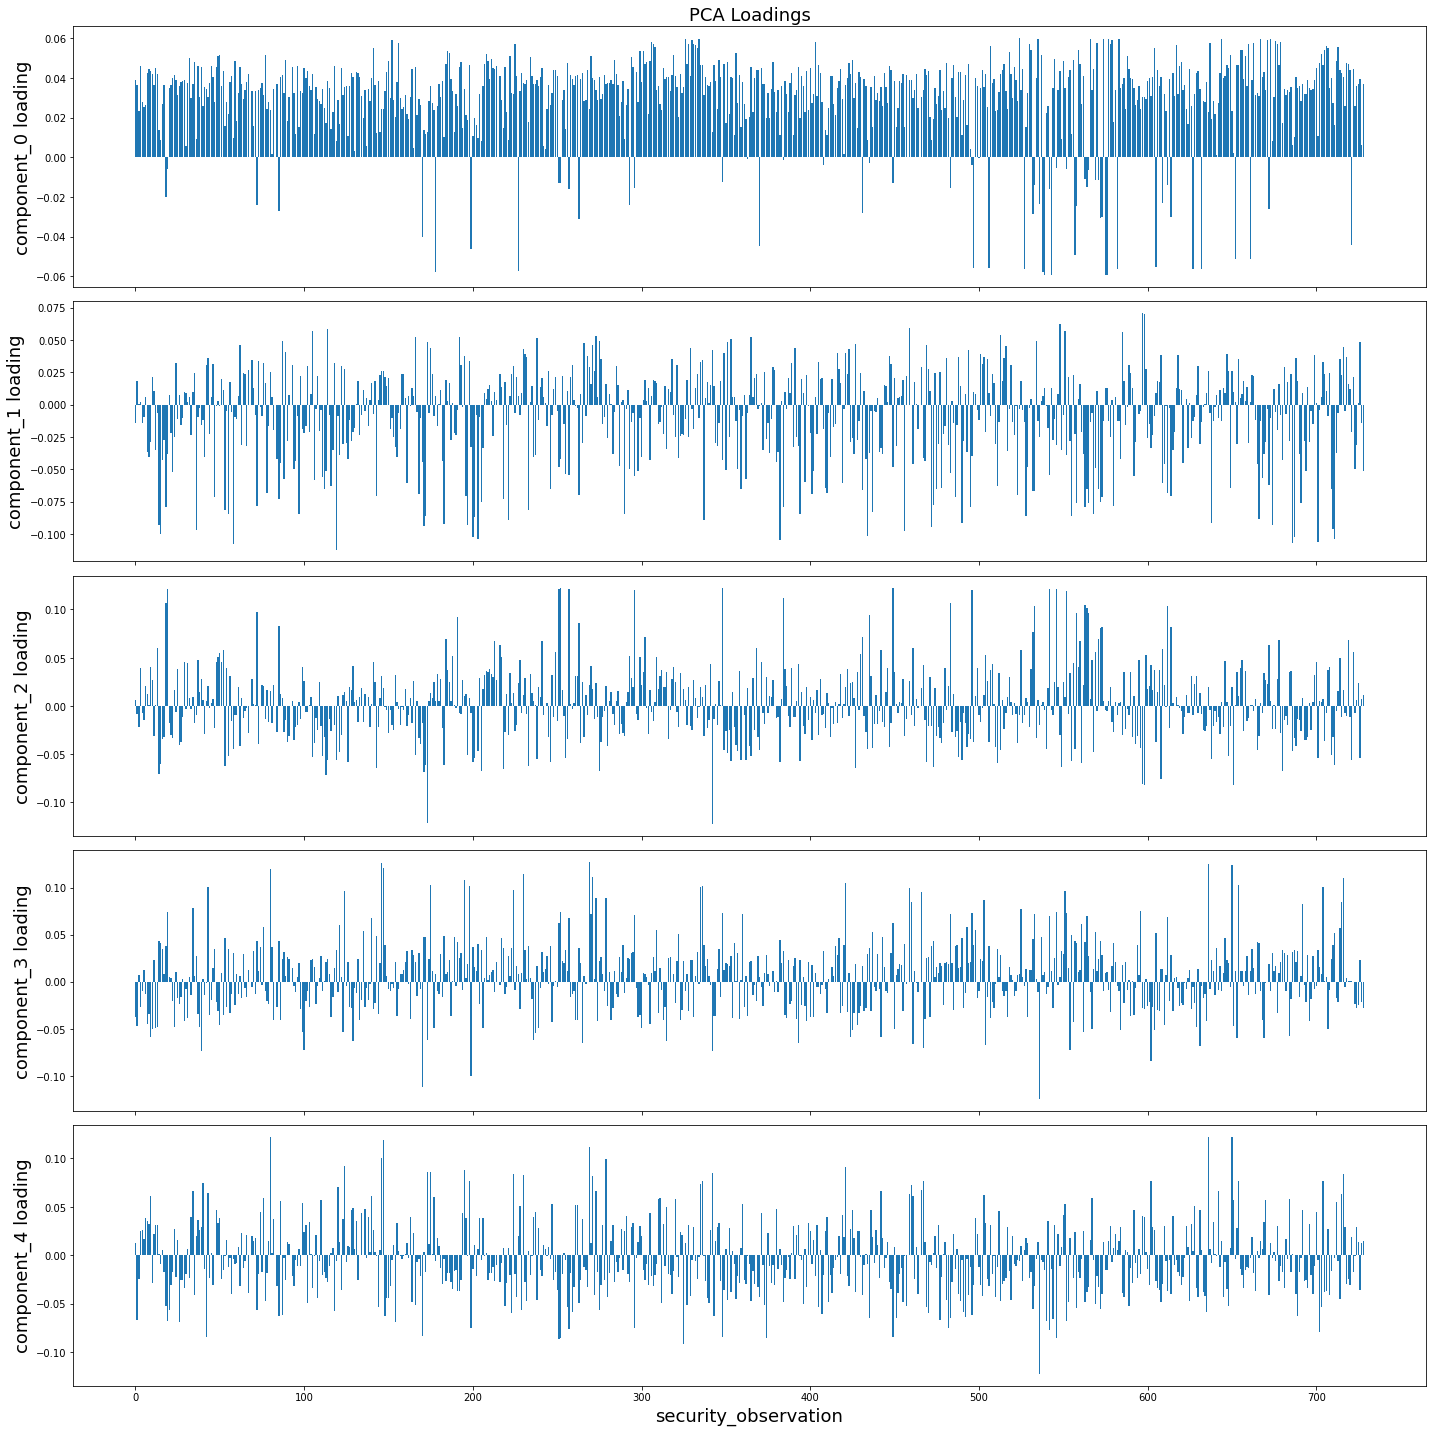

In [12]:
op.reduce_PCA()
op.plot_loadings()

In [13]:
op.find_pairs()
op.pairs

Found 1744 potential pairs


C:\Users\maike\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:803: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


0         (ABT, BAX)
1         (ABT, BSX)
2         (ABT, COO)
3         (ABT, CRL)
4         (ABT, DHR)
            ...     
1739    (GDXJ, NUGT)
1740    (GDXJ, SILJ)
1741    (JNUG, NUGT)
1742    (JNUG, SILJ)
1743    (NUGT, SILJ)
Length: 1744, dtype: object

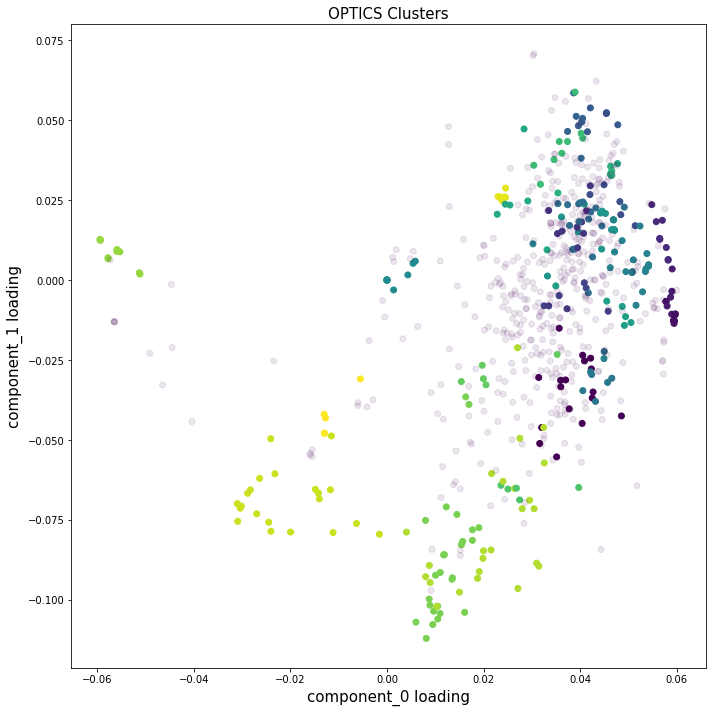

In [47]:
op.plot_clusters(n_dimensions=2)

In [15]:
op.calc_eg_norm_spreads()
op.calc_hurst_exponents()
op.calc_half_lives()
op.calc_avg_cross_count()

C:\Users\maike\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\maike\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\maike\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(ne

In [16]:
op.filter_pairs()
op.filtered_pairs

Found 138 tradable pairs!


,pair,pvalue,hurst_exp,half_life,avg_cross_count
13,"(ABT, TFX)",0.009482,0.111589,6.601662,38.103093
23,"(BAX, IQV)",0.043217,0.124050,9.974228,24.247423
26,"(BAX, SYK)",0.002322,0.018101,6.943224,31.175258
136,"(DIA, ITOT)",0.016405,0.150034,7.695716,25.113402
137,"(DIA, SCHX)",0.034227,0.129842,9.059775,19.917526
...,...,...,...,...,...
1706,"(SPTI, TIP)",0.018083,0.154440,9.531872,34.639175
1713,"(TFI, TIP)",0.006716,0.208262,8.065503,31.175258
1715,"(TFI, VTEB)",0.033937,0.208945,3.777126,29.443299
1717,"(TIP, VTEB)",0.001493,0.163003,6.065661,34.639175


In [17]:
#for i in op.filtered_pairs.index:
    #op.plot_pair_price_spread(idx=i)

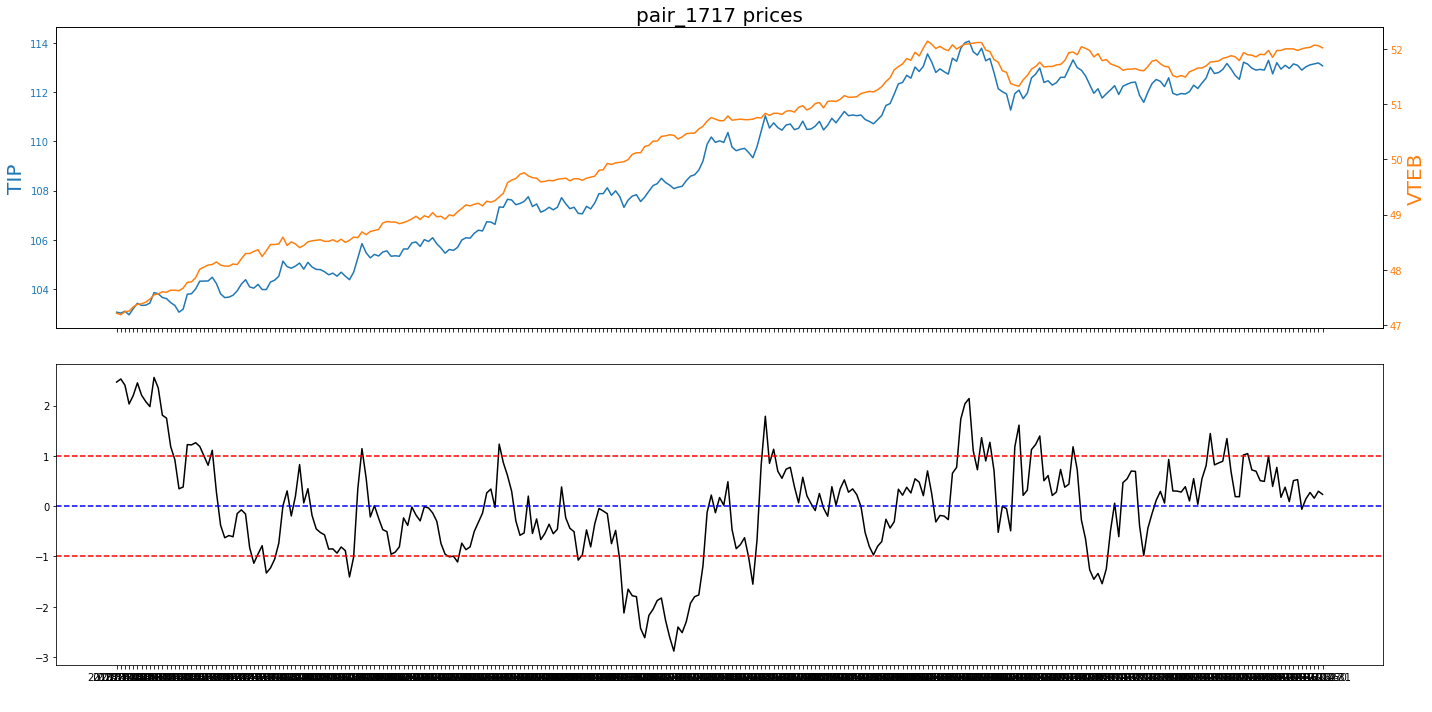

In [51]:
op.plot_pair_price_spread(idx=1717)

In [19]:
op.alpha

5.789328544619649

In [20]:
op.norm_spreads

,0,1,2,3,4,5,6,7,8,9,...,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-05,0.866200,0.590158,-0.436305,-1.158990,-0.936560,-0.346600,0.779872,-1.619746,-0.492779,-1.420193,...,-0.900580,-1.175102,-1.128675,1.265284,-0.986990,-0.489110,1.435944,-0.783394,0.499541,0.704607
2018-11-06,0.818604,0.785413,-0.346476,-1.094927,-1.322019,-0.301860,0.802727,-1.519614,-0.381758,-1.519093,...,-0.711409,-1.094560,-1.104007,1.086819,-0.977009,-0.601090,1.294724,-0.671265,0.395343,0.552732
2018-11-07,1.386773,1.137184,-0.290057,-1.699053,-1.502395,-0.378388,0.901792,-1.384436,-0.532014,-1.666753,...,-0.541609,-1.040329,-1.099725,0.804712,-0.993553,-0.715928,1.013591,-0.586143,0.172728,0.302441
2018-11-08,1.456910,1.369012,-0.267515,-1.596133,-1.590508,-0.552788,0.954787,-1.292280,-0.157106,-1.488419,...,-0.240694,-0.916662,-1.066972,0.800187,-0.991016,-0.891723,1.122776,-0.419478,0.255028,0.310029
2018-11-09,1.503232,1.551168,-0.338665,-1.659024,-1.579661,-0.774360,0.561245,-1.261075,0.060038,-1.396043,...,-0.312455,-0.913339,-1.092777,0.850477,-0.940170,-0.873550,1.172471,-0.382455,0.315825,0.343097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.213843,1.521478,1.000489,0.312890,0.603945,0.428532,1.784824,1.278488,1.072789,0.435184,...,-1.205922,0.455504,1.246753,2.701701,1.155824,2.034828,2.686285,-0.451868,2.705427,2.863150
2019-12-26,1.317917,1.482214,1.155322,0.264325,0.533562,0.427856,1.587405,1.302128,1.179668,0.447944,...,-1.697860,0.096869,0.963265,2.927620,0.929055,2.134093,2.756199,-0.799080,2.645535,2.972704
2019-12-27,1.445450,1.410253,1.113628,0.286310,0.486233,0.315264,1.628901,1.316426,1.174760,0.473014,...,-1.290272,0.431531,1.107995,2.553970,1.164226,1.976318,2.459598,-0.381936,2.542626,2.687048


In [46]:
buy = 0
sell = 0

par = 26

for i in range(len(op.norm_spreads)):
    if buy == 0 and sell == 0:
        if op.norm_spreads[par][i] > 1:
            print('Entrada', op.alpha, op.beta, op.norm_spreads.index[i])
            print('compra', op.filtered_pairs.loc[par]['pair'][1], '\n', 'venda', op.filtered_pairs.loc[par]['pair'][0])
            sell = 1
    if buy == 0 and sell == 0:
        if op.norm_spreads[par][i] < -1:
            print('Entrada', op.alpha, op.beta, op.norm_spreads.index[i])
            print('compra', op.filtered_pairs.loc[par]['pair'][0], '\n', 'venda', op.filtered_pairs.loc[par]['pair'][1])
            buy = 1
    
    if buy == 1 and op.norm_spreads[par][i] > 0:
        buy = 0
        print('compra finalizada', op.norm_spreads.index[i])

    elif sell == 1 and op.norm_spreads[par][i] < 0:
        sell = 0
        print('venda finalizada', op.norm_spreads.index[i])

sell 5.789328544619649 0.026023320834266714 2018-11-05
compra SYK 
 venda BAX
venda finalizada 2018-12-17
buy 5.789328544619649 0.026023320834266714 2018-12-21
compra BAX 
 venda SYK
compra finalizada 2019-01-30
buy 5.789328544619649 0.026023320834266714 2019-04-01
compra BAX 
 venda SYK
compra finalizada 2019-06-07
sell 5.789328544619649 0.026023320834266714 2019-07-09
compra SYK 
 venda BAX
venda finalizada 2019-07-30
buy 5.789328544619649 0.026023320834266714 2019-10-10
compra BAX 
 venda SYK
compra finalizada 2019-10-24
sell 5.789328544619649 0.026023320834266714 2019-10-25
compra SYK 
 venda BAX
venda finalizada 2019-11-20
buy 5.789328544619649 0.026023320834266714 2019-12-10
compra BAX 
 venda SYK
compra finalizada 2019-12-19


In [44]:
op.filtered_pairs.loc[136]['pair'][0]

'DIA'